In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [100]:
# load datasets 
d1 = pd.read_csv("student-mat.csv",sep=';')
d2 = pd.read_csv("student-por.csv",sep=';')
df = pd.concat([d1,d2])
df['grade']=df['G1']+df['G2']+df['G3']
df = df.drop(["G1", "G2", "G3"], axis=1)
df.rename({'dropout': 'failures'}, axis=1, inplace=True)
df['dropout'] = 'na'
df['grade'] = pd.to_numeric(df['grade']) 
df.loc[(df.grade >13), 'dropout'] = '0' 
df.loc[(df.grade <=13), 'dropout'] = '1' 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade,dropout
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,17,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,16,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,25,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,44,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,26,0


In [118]:
print(df.groupby('dropout').size())
df.shape

dropout
0    1009
1      35
dtype: int64


(1044, 31)

In [102]:
# label encoding and preprocessing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.dropout = le.fit_transform(df.dropout)
df.school = le.fit_transform(df.school)
df.sex = le.fit_transform(df.sex)
df.famsize = le.fit_transform(df.famsize)
df.address = le.fit_transform(df.address)
df.Pstatus = le.fit_transform(df.Pstatus)
df.Medu = le.fit_transform(df.Medu)
df.Fjob = le.fit_transform(df.Fjob)
df.Mjob = le.fit_transform(df.Mjob)
df.reason = le.fit_transform(df.reason)
df.guardian = le.fit_transform(df.guardian)
df.schoolsup = le.fit_transform(df.schoolsup)
df.famsup = le.fit_transform(df.famsup)
df.paid = le.fit_transform(df.activities)
df.activities = le.fit_transform(df.activities)
df.nursery = le.fit_transform(df.nursery)
df.higher = le.fit_transform(df.higher)
df.internet = le.fit_transform(df.internet)
df.romantic = le.fit_transform(df.romantic)
df = df.drop(["grade"], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,dropout
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,0,0,1,1,1,0,4,3,2,2,3,3,10,0
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,4,0


In [0]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'dropout'], df['dropout'], stratify=df['dropout'], random_state=66)

In [104]:
#Decision_Tree
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

2    0.969349
dtype: float64

In [105]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.966794380587484 , Cross Validation Score : 0.9655172413793104


In [110]:
#Cross Validation to find a good # of estimators for Random Forest
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

17    0.969349
55    0.969349
dtype: float64

In [111]:
# Crossvalidation to find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

0     0.965517
1     0.965517
2     0.965517
3     0.965517
4     0.965517
5     0.965517
6     0.965517
7     0.965517
8     0.965517
9     0.965517
10    0.965517
11    0.965517
12    0.965517
13    0.965517
14    0.965517
15    0.965517
16    0.965517
17    0.965517
18    0.965517
19    0.965517
20    0.965517
21    0.965517
22    0.965517
23    0.965517
24    0.965517
25    0.965517
26    0.965517
27    0.965517
28    0.965517
29    0.965517
30    0.965517
31    0.965517
32    0.965517
33    0.965517
34    0.965517
35    0.965517
36    0.965517
37    0.965517
38    0.965517
39    0.965517
40    0.965517
41    0.965517
42    0.965517
43    0.965517
44    0.965517
45    0.965517
46    0.965517
47    0.965517
48    0.965517
49    0.965517
50    0.965517
51    0.965517
52    0.965517
53    0.965517
54    0.965517
55    0.965517
56    0.965517
dtype: float64

In [119]:
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))


Random Forest Model Score : 0.9744572158365262 , Cross Validation Score : 0.9655172413793104


In [115]:
y_pred =t.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[252   0]
 [  9   0]]


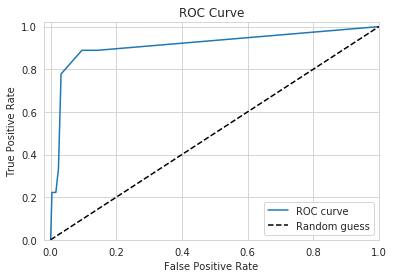

In [116]:
y_pred_prob = t.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


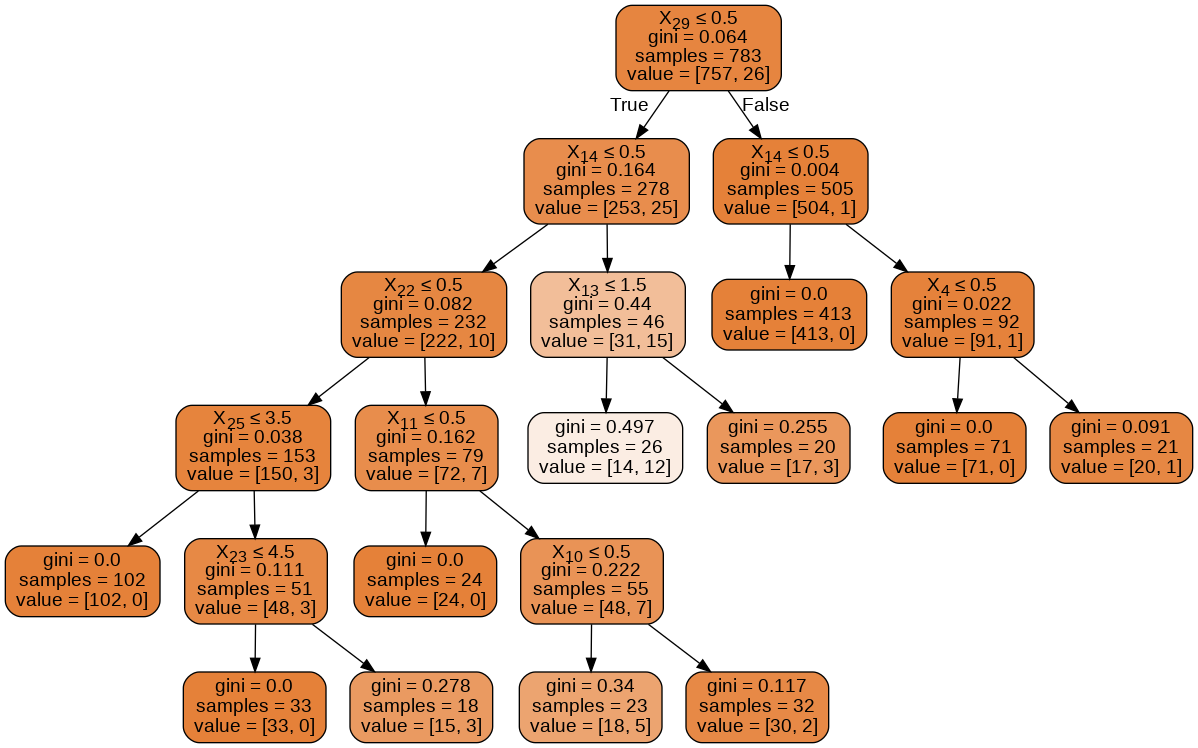

In [117]:
df4_features = [x for i,x in enumerate(df.columns) if i!=45]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [113]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.966794380587484 , Cross Validation Score : 0.9655172413793104


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [114]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.966794380587484 , Cross Validation Score : 0.9655172413793104
